In [4]:
# Importazione del df e dei moduli necessari

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy as sp

In [5]:
df = pd.read_csv("songs_normalize.csv")

In [6]:
display(df)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [8]:
df.reset_index(inplace=True)

In [9]:
# Creating a new dataframe for the matching
df_genres = pd.DataFrame(columns=['id_track', 'genre'])  # "id_track" and "genre" are the columns in the dataframe

# Creating a function that finds id and genres of the given row (the row must be a spotify track)
def get_genres(row):
    i = row['index']
    for genre in row['genre'].split(', '):
        df_genres.loc[len(df_genres)] = [i, genre.strip()]

# Applying the function to every row in df
df.apply( get_genres , axis = 1 ) 

df_genres

,id_track,genre
0,0,pop
1,1,rock
2,1,pop
3,2,pop
4,2,country
...,...,...
3699,1996,pop
3700,1997,hip hop
3701,1997,country
3702,1998,pop


In [11]:
tpg = df_genres.groupby("genre", as_index=False).size()
sorted_tpg = tpg.sort_values(by="size", ascending=False)
sorted_tpg

,genre,size
12,pop,1633
8,hip hop,778
2,R&B,452
0,Dance/Electronic,390
13,rock,234
11,metal,66
10,latin,64
14,set(),22
6,country,21
1,Folk/Acoustic,20


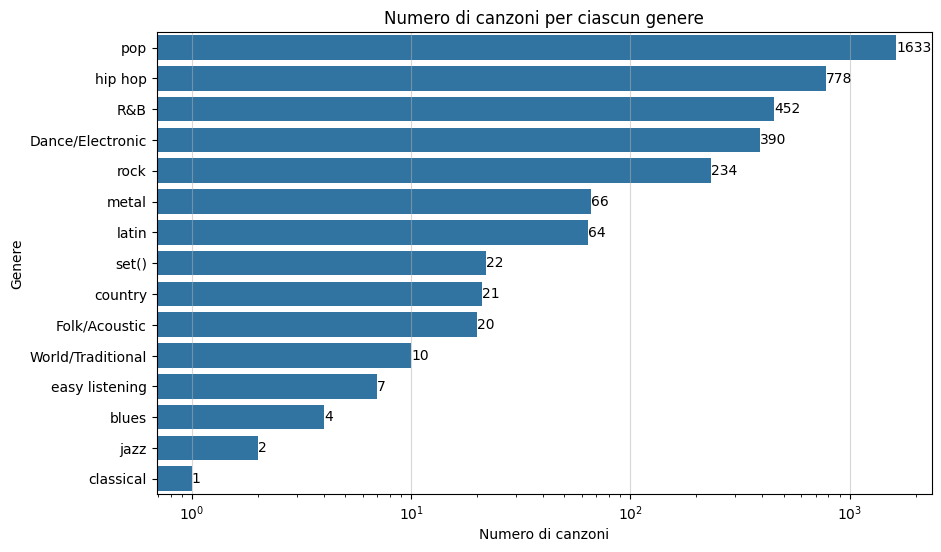

In [9]:
plt.figure(figsize=(10, 6))

# Impostazione delle etichette del grafico
plt.title('Numero di canzoni per ciascun genere')
plt.xlabel('Numero di canzoni')
plt.ylabel('Genere')

# Impostazioni ulteriori
plt.xscale("log")  # per migliorare la visualizzazione dei dati si imposta la scala logaritmica per l'asse delle ascisse
plt.grid(axis='x', alpha=0.5)  # si imposta una griglia per il solo asse x con canale alpha (trasparenza) impostato a 0.5

bp = sns.barplot(x="size", y="genre", data=sorted_tpg)

# Aggiunta delle etichette
for index, value in enumerate(sorted_tpg["size"]):
    bp.text(value, index, str(value), color='black', ha="left", va="center")

plt.show()

In [129]:
df_genres.reset_index(inplace=True)

In [12]:
m_pop = df_genres["genre"] == "pop"

pop_songs = pd.merge(df[ (df["year"]>= 2000) & (df["year"]<= 2019) ], df_genres[m_pop], left_on="index", right_on="id_track")[["artist", "song", "explicit", "duration_ms", "danceability", "energy", "valence", "tempo"]]
"""
print("duration ms: ", pop_songs["duration_ms"].mean())
print("danceability: ", pop_songs["danceability"].mean())
print("energy: ", pop_songs["energy"].mean())
print("valence: ", pop_songs["valence"].mean())
print()
print("bpm max: ", pop_songs["tempo"].max())
print("bpm min: ", pop_songs["tempo"].min())
print("bpm avg: ", pop_songs["tempo"].mean())
print("bpm median: ", pop_songs["tempo"].median())
"""

pop_songs

,artist,song,explicit,duration_ms,danceability,energy,valence,tempo
0,Britney Spears,Oops!...I Did It Again,False,211160,0.751,0.834,0.894,95.053
1,*NSYNC,Bye Bye Bye,False,200560,0.614,0.928,0.879,172.656
2,Robbie Williams,Rock DJ,False,258560,0.708,0.772,0.861,103.035
3,Gigi D'Agostino,L'Amour Toujours,False,238759,0.617,0.728,0.808,139.066
4,Bomfunk MC's,Freestyler,False,306333,0.822,0.922,0.568,163.826
...,...,...,...,...,...,...,...,...
1596,Normani,Motivation,False,193837,0.599,0.887,0.881,170.918
1597,Joel Corry,Sorry,False,188640,0.744,0.790,0.847,125.002
1598,Jonas Brothers,Sucker,False,181026,0.842,0.734,0.952,137.958
1599,Taylor Swift,Cruel Summer,False,178426,0.552,0.702,0.564,169.994


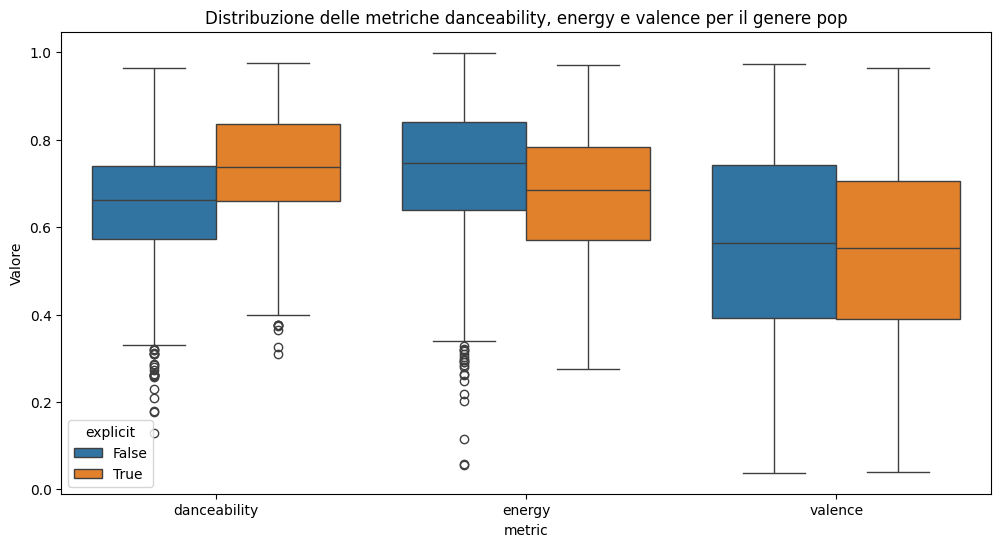

In [13]:
pop_songs_melted = pop_songs.melt(id_vars=["explicit"], value_vars=['danceability', 'energy', 'valence'], var_name='metric', value_name='value')

# Creare i box plot con Seaborn
plt.figure(figsize=(12,6))
sns.boxplot(x='metric', y='value', data=pop_songs_melted, hue="explicit")
plt.title('Distribuzione delle metriche danceability, energy e valence per il genere pop')
plt.ylabel('Valore')
plt.show()

In [14]:
m_hip_hop = df_genres["genre"] == "hip hop"
hip_hop_songs = pd.merge(df, df_genres[m_hip_hop], left_on="index", right_on="id_track")[["artist", "song", "explicit", "duration_ms", "danceability", "energy", "valence", "tempo"]]
hip_hop_songs

,artist,song,explicit,duration_ms,danceability,energy,valence,tempo
0,Sisqo,Thong Song,True,253733,0.706,0.888,0.714,121.549
1,Eminem,The Real Slim Shady,True,284200,0.949,0.661,0.760,104.504
2,Aaliyah,Try Again,False,284000,0.797,0.622,0.731,93.020
3,Dr. Dre,The Next Episode,True,161506,0.922,0.909,0.309,95.295
4,M.O.P.,Cold as Ice,True,244466,0.656,0.880,0.758,85.565
...,...,...,...,...,...,...,...,...
773,iann dior,gone girl,True,136568,0.677,0.714,0.355,94.956
774,NSG,Options,True,240081,0.836,0.621,0.762,101.993
775,Post Malone,Goodbyes (Feat. Young Thug),True,174960,0.580,0.653,0.175,150.231
776,Blanco Brown,The Git Up,False,200593,0.847,0.678,0.811,97.984


In [1]:
hip_hop_songs_melted = hip_hop_songs.melt(id_vars=["explicit"], value_vars=['danceability', 'energy', 'valence'], var_name='metric', value_name='value')

# Creare i box plot con Seaborn
plt.figure(figsize=(12,6))
sns.boxplot(x='metric', y='value', data=hip_hop_songs_melted, hue="explicit")
plt.title('Distribuzione delle metriche danceability, energy e valence per il genere hip hop')
plt.ylabel('Valore')
plt.show()

NameError: name 'hip_hop_songs' is not defined

In [15]:
m_rb = df_genres["genre"] == "R&B"
rb_songs = pd.merge(df, df_genres[m_rb], left_on="index", right_on="id_track")[["artist", "song", "explicit", "duration_ms", "danceability", "energy", "valence", "tempo"]]
rb_songs

,artist,song,explicit,duration_ms,danceability,energy,valence,tempo
0,Sisqo,Thong Song,True,253733,0.706,0.888,0.714,121.549
1,Destiny's Child,Say My Name,False,271333,0.713,0.678,0.734,138.009
2,Aaliyah,Try Again,False,284000,0.797,0.622,0.731,93.020
3,Da Brat,What'chu Like (feat. Tyrese),True,221160,0.879,0.681,0.817,99.974
4,Debelah Morgan,Dance with Me,False,220106,0.850,0.674,0.740,115.005
...,...,...,...,...,...,...,...,...
447,Drake,Money In The Grave (Drake ft. Rick Ross),True,205426,0.831,0.502,0.101,100.541
448,Khalid,Better,False,229412,0.442,0.585,0.116,97.565
449,Megan Thee Stallion,Hot Girl Summer (feat. Nicki Minaj & Ty Dolla ...,True,199427,0.872,0.814,0.570,98.985
450,Kehlani,Nights Like This (feat. Ty Dolla $ign),True,201787,0.610,0.725,0.291,146.163


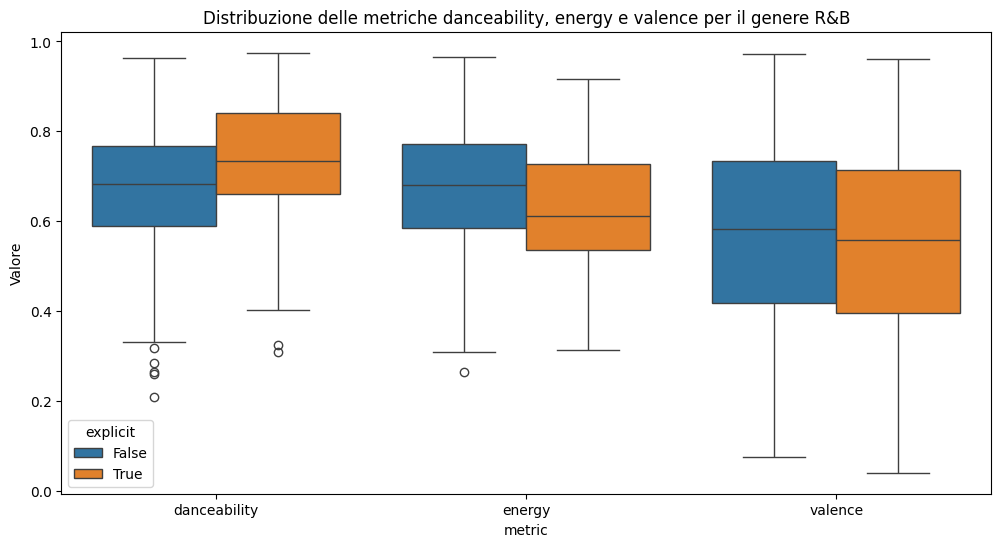

In [16]:
rb_songs_melted = rb_songs.melt(id_vars=["explicit"], value_vars=['danceability', 'energy', 'valence'], var_name='metric', value_name='value')

# Creare i box plot con Seaborn
plt.figure(figsize=(12,6))
sns.boxplot(x='metric', y='value', data=rb_songs_melted, hue="explicit")
plt.title('Distribuzione delle metriche danceability, energy e valence per il genere R&B')
plt.ylabel('Valore')
plt.show()

In [15]:
gc = pd.merge(df, df_genres, left_on="index", right_on="id_track").groupby(["genre_y", "explicit"]).aggregate({"danceability" : "mean", "energy" : "mean", "valence" : "mean"})
#gc.reset_index(inplace=True)
gc

danceability    energy   valence
genre_y           explicit                                  
Dance/Electronic  False         0.657968  0.770776  0.539636
                  True          0.732783  0.739804  0.514500
Folk/Acoustic     False         0.570053  0.741000  0.585789
                  True          0.517000  0.492000  0.455000
R&B               False         0.672804  0.674555  0.567956
                  True          0.732405  0.627048  0.550737
World/Traditional False         0.577111  0.692889  0.641667
                  True          0.836000  0.621000  0.762000
blues             False         0.649750  0.669750  0.495500
classical         False         0.590000  0.578000  0.264000
country           False         0.575050  0.723500  0.517200
                  True          0.640000  0.620000  0.609000
easy listening    False         0.612000  0.689714  0.570286
hip hop           False         0.694051  0.732900  0.593299
                  True          0.737817  0.670970  0.535210
jazz              False         0.548000  0.233000  0.225000
latin             False         0.720931  0.800000  0.707069
                  True          0.754500  0.676000  0.516500
metal             False         0.503579  0.828228  0.433479
                  True          0.558444  0.865444  0.558378
pop               False         0.649558  0.728532  0.556913
                  True          0.732029  0.673716  0.545036
rock              False         0.550374  0.790780  0.520351
                  True          0.612000  0.801400  0.566720
set()             False         0.740250  0.737700  0.669200
                  True          0.726500  0.751500  0.604000

In [73]:
most_popular_genres = sorted_tpg.head(4)["genre"]
most_popular_genres

12                 pop
8              hip hop
2                  R&B
0     Dance/Electronic
Name: genre, dtype: object

In [76]:
mask = gc["genre_y"].isin(most_popular_genres)

aux = gc[mask]
aux

,genre_y,explicit,danceability,energy,valence
0,Dance/Electronic,False,0.657968,0.770776,0.539636
1,Dance/Electronic,True,0.732783,0.739804,0.514500
4,R&B,False,0.672804,0.674555,0.567956
5,R&B,True,0.732405,0.627048,0.550737
13,hip hop,False,0.694051,0.732900,0.593299
14,hip hop,True,0.737817,0.670970,0.535210
20,pop,False,0.649558,0.728532,0.556913
21,pop,True,0.732029,0.673716,0.545036


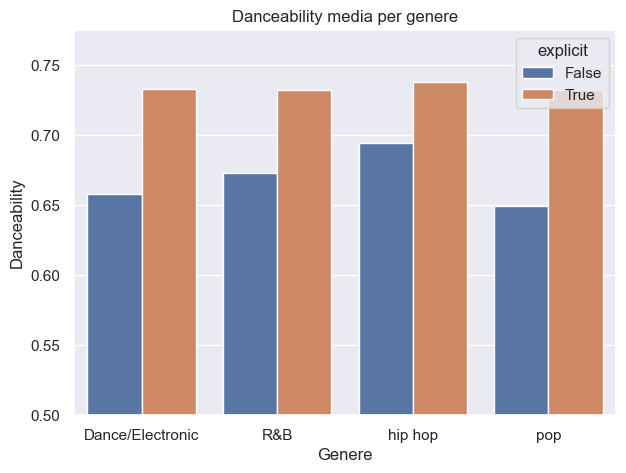

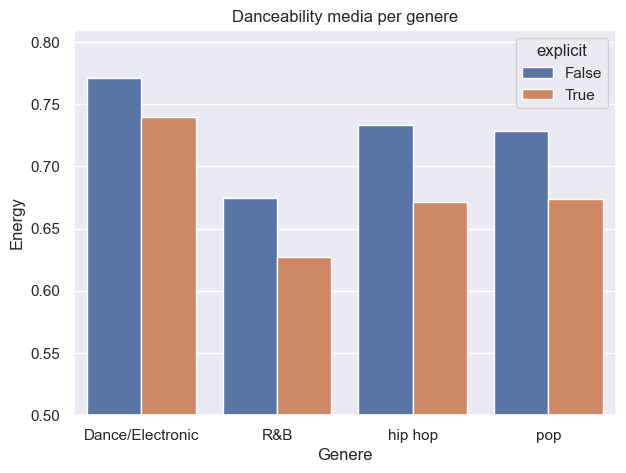

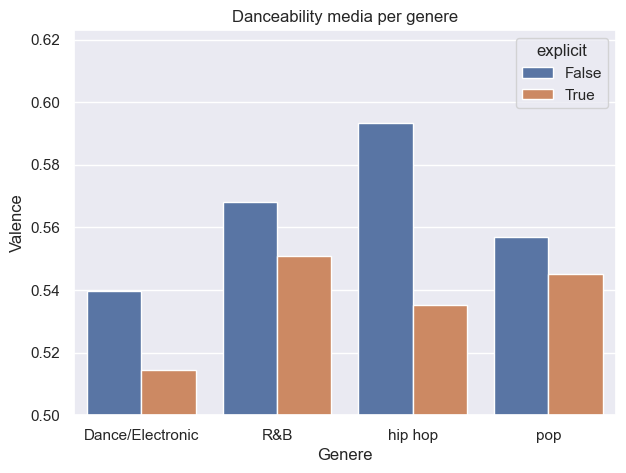

In [99]:

"""
sns.catplot(data=aux, kind="bar", x="genre_y", y="danceability", hue="explicit", alpha=.6, height=6)

plt.title("Danceability media per genere")
plt.xlabel("Genere")
plt.ylabel("Danceability")
plt.ylim(bottom=0.5)


# Aggiunta di energy e valence
for metric in ['energy', 'valence']:
    g = sns.catplot(
        data=aux, kind="bar",
        x="genre_y", y=metric, hue="explicit",
        palette="dark", alpha=.6, height=6
    )
    #g.despine(left=True)
    g.set_axis_labels("Genre", f"Mean {metric.capitalize()}")
    g.legend.set_title("Explicit")
"""
for metric in aux.columns[2:]:
    plt.figure(figsize=(7,5))
    sns.barplot(data=aux, x="genre_y", y=metric, hue="explicit")
    plt.title("Danceability media per genere")
    plt.xlabel("Genere")
    plt.ylabel(metric.capitalize())
    plt.ylim(bottom=0.5)
    plt.show()

In [94]:
aux.columns

Index(['genre_y', 'explicit', 'danceability', 'energy', 'valence'], dtype='object')

## Correlazioni tra parametri su GC

In [101]:
# Calcolo coefficiente di correlazione di Pearson tra Energy e Valence
corr_pearson = sp.stats.pearsonr(gc["energy"], gc["valence"])
print(f"{corr_pearson[0]}  |  {corr_pearson[1]}")

# Calcolo coefficiente di correlazione di Spearman tra Energy e Valence
corr_spearman = sp.stats.spearmanr(gc["energy"], gc["valence"])
print(f"{corr_spearman[0]}  |  {corr_spearman[1]}")

# Calcolo coefficiente di correlazione di Kendall tra Energy e Valence
corr_kendall = sp.stats.kendalltau(gc["energy"], gc["valence"])
print(f"{corr_kendall[0]}  |  {corr_kendall[1]}")

0.5530068365898494  |  0.003388646611061249
0.23897435897435895  |  0.23969991208512575
0.1876923076923077  |  0.18792092490203857


In [102]:
# Calcolo coefficiente di correlazione di Pearson tra Danceability e Valence
corr_pearson = sp.stats.pearsonr(gc["danceability"], gc["valence"])
print(f"{corr_pearson[0]}  |  {corr_pearson[1]}")

# Calcolo coefficiente di correlazione di Spearman tra Danceability e Valence
corr_spearman = sp.stats.spearmanr(gc["danceability"], gc["valence"])
print(f"{corr_spearman[0]}  |  {corr_spearman[1]}")

# Calcolo coefficiente di correlazione di Kendall tra Danceability e Valence
corr_kendall = sp.stats.kendalltau(gc["danceability"], gc["valence"])
print(f"{corr_kendall[0]}  |  {corr_kendall[1]}")

0.5432226413841412  |  0.004132703228233935
0.38262951491006475  |  0.053703016493801874
0.26502342708538723  |  0.05795554937259211


In [103]:
# Calcolo coefficiente di correlazione di Pearson tra Energy e Danceability
corr_pearson = sp.stats.pearsonr(gc["danceability"], gc["energy"])
print(f"{corr_pearson[0]}  |  {corr_pearson[1]}")

# Calcolo coefficiente di correlazione di Spearman tra Danceability e Valence
corr_spearman = sp.stats.spearmanr(gc["danceability"], gc["energy"])
print(f"{corr_spearman[0]}  |  {corr_spearman[1]}")

# Calcolo coefficiente di correlazione di Kendall tra Danceability e Valence
corr_kendall = sp.stats.kendalltau(gc["danceability"], gc["energy"])
print(f"{corr_kendall[0]}  |  {corr_kendall[1]}")

0.08833212249186413  |  0.6678532490324482
-0.12754317163668824  |  0.5346624375383942
-0.11094003924504582  |  0.4273767097701554
